# Housing Price Prediction

Dataset is taken from kaggle website.<br>
Link to the dataset: https://www.kaggle.com/camnugent/california-housing-prices <br>
Dataset is the housing.csv file which is downloaded from the above-mentioned link and stored locally.<br>
It contains median house prices and other attributes for California districts derived from the 1990 census.

In [1]:
# numpy module is used for the ndarray objects.
# ndarray objects are used to store final training and testing sets.
# sklearn library that is used for machine learning uses training set and test set in the form of ndarray object.
import numpy as np 

In [2]:
# pandas module is used for the dataframe objects.
# dataframe objects are used to store raw dataset and perform feature engineering on it using methods in pandas module.
import pandas as pd

In [3]:
# read housing.csv file into pandas dataframe.
# pandas has read_csv method to load the dataset directly from the given absolute location of csv file.
housing_df = pd.read_csv(r'F:\Fall 2020\Probability and Statistics\Stat_Project\housing.csv')
# housing_df is the pandas dataframe that holds housing price dataset

Make a train-test split and keep the test set aside.

In [4]:
# sklearn.model_selection module has the train_test_split method to make a split.
# It can be given the proportion of split as input.
from sklearn.model_selection import train_test_split

In [5]:
housing_train_df, housing_test_df = train_test_split(housing_df, test_size=0.2, random_state = 42)
# housing_train_df is the training set stored as dataframe object.
# housing_test_df is the testing set stored as dataframe object.

We now keep the test set aside and never look at it until the final model is trained.

We are going to try out various regression models on housing price dataset. <br>
There will be a need to perform model selection to choose the final model to be used for price prediction. <br>
To facilitate model selection, we create a cross-validation set by using the same train_test_split method.

Make a train - cross validation split and keep the cross-validation set aside for model selection.

In [6]:
housing_train_df, housing_crossval_df = train_test_split(housing_train_df, test_size=0.2, random_state=42)
# housing_train_df stores remaining training set as dataframe object. <br>
# housing_crossval_df stores crossvalidation set as dataframe object to be used for model selection.

First few records (rows) in the dataset

In [7]:
housing_train_df.head()
# head method on dataframe object displays first 5 records (rows) in it.
# Likewise, tail method on dataframe object displays last 5 records (rows) in it.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16490,-120.97,38.00,27.0,1683.0,288.0,873.0,258.0,4.7069,176900.0,INLAND
6090,-117.87,34.10,15.0,6409.0,1363.0,3359.0,1267.0,3.8750,173300.0,<1H OCEAN
10973,-117.85,33.76,26.0,2312.0,525.0,1273.0,437.0,2.8828,204700.0,<1H OCEAN
17287,-119.74,34.35,34.0,1664.0,292.0,705.0,257.0,5.0000,329400.0,NEAR OCEAN
12615,-121.51,38.50,25.0,4719.0,745.0,1857.0,739.0,5.0371,180200.0,INLAND


Description of columns in the dataset

In [8]:
housing_train_df.info()
# info method on dataframe object gives a concise summary of the attributes present in the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13209 entries, 16490 to 8472
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13209 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
 8   median_house_value  13209 non-null  float64
 9   ocean_proximity     13209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [9]:
# function to seperate numerical and categorical attributes into two different dataframe objects.
# numerical attributes will be processed differently than that of categorical attributes.
def seperate_num_cat(df):
    num_df = df.drop('ocean_proximity',axis=1) # drop ocean_proximity columns which is the only categorical attribute.
    cat_df = df[['ocean_proximity']] # fetch ocean_proxmity column which is the only categorical attribute.
    return num_df,cat_df # return a tuple of two dataframe objects created.

In [10]:
housing_num_df,housing_cat_df = seperate_num_cat(housing_train_df)
# housing_num_df stores numerical attributes of the training set.
# housing_cat_df stores categorical attributes of the training set.

Summary of numerical attributes in the dataset

In [11]:
housing_num_df.describe()
# describe method on dataframe object displays a summary of numerical attributes present in the dataframe.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000
mean,-119.583303,35.646848,28.567265,2636.231433,537.250132,1426.916496,499.104323,3.868934,206691.726399
std,2.005265,2.133844,12.589469,2148.877491,413.438403,1137.213576,376.030814,1.889896,115149.783348
min,-124.350000,32.560000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1457.000000,298.000000,790.000000,282.000000,2.561000,119300.000000
50%,-118.510000,34.270000,29.000000,2128.000000,437.000000,1168.000000,411.000000,3.546100,179600.000000
75%,-118.010000,37.720000,37.000000,3153.000000,648.000000,1727.000000,606.000000,4.746300,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Each of the numerical attributes may contain some missing values which must be filled before proceeding ahead. <br>
We have chosen to fill in the missing values in a column with the median of values in that column.

In [12]:
from sklearn.impute import SimpleImputer
# sklearn.impute module has SimpleImputer class which can be used to fill in the missing values in a dataframe.

In [13]:
# function to fill in the missing values in all columns with their respective median values.
def fill_in_missing_values(df):
    imputer = SimpleImputer(strategy='median') # create imputer object by specifying fill-in strategy to be median values.
    arr = imputer.fit_transform(df) # fit_transform will fill-in the missing places and return ndarray object.
    df = pd.DataFrame(arr,columns=df.columns) # ndarray object can be passed to the DataFrame constructor to make dataframe object.
    return df # return the dataframe object that has no missing values.

In [14]:
housing_num_df = fill_in_missing_values(housing_num_df)
# fill in the missing values by calling the function written above.

In [15]:
# Below is the magic command to display the plots directly in the cells of jupyter notebook

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
# matplotlib has pyplot module that is used for plotting in exploratory data analysis.

Histogram for every numerical attribute

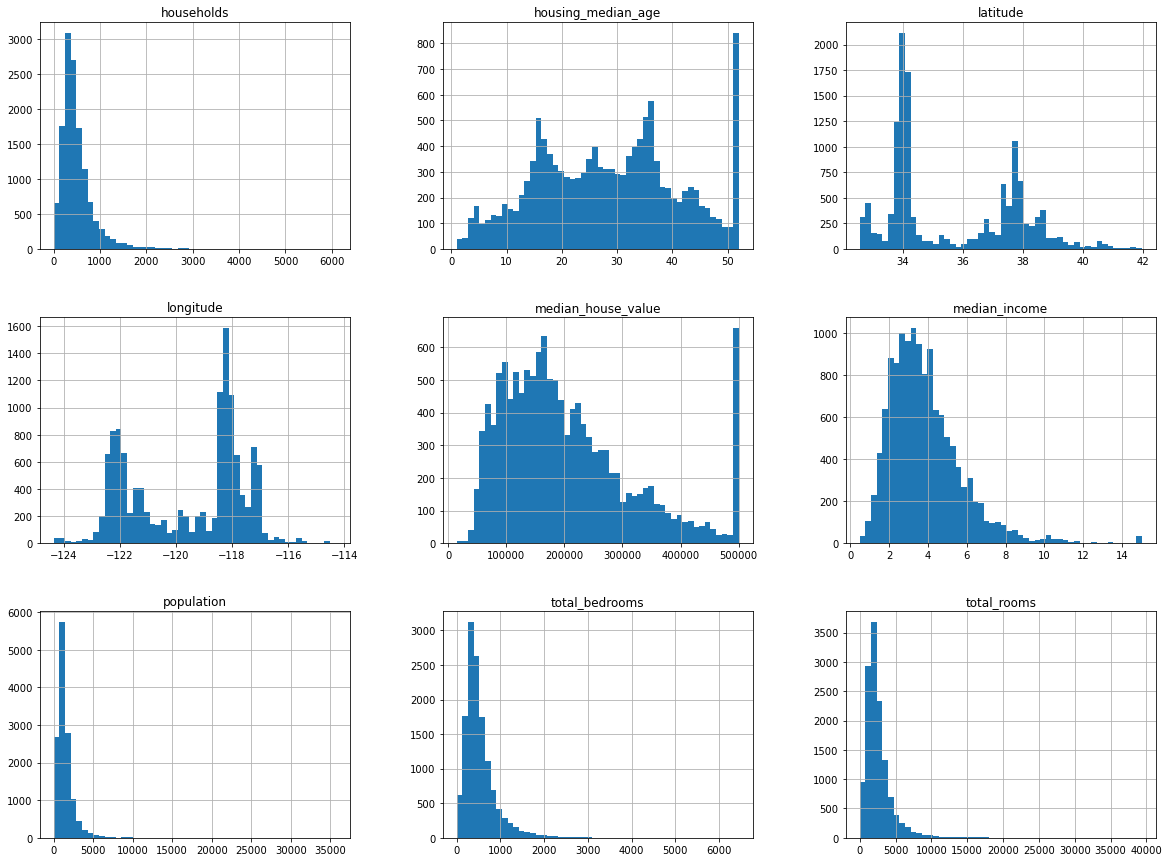

In [18]:
housing_num_df.hist(bins=50 , figsize = (20,15))
# hist method on dataframe objects shows histograms of all the numerical attributes with the given number of bins.
plt.show() # show the histograms

Scatter plot of latitude vs longitude

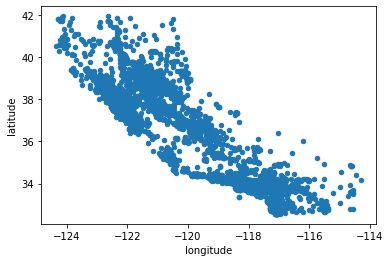

In [19]:
housing_num_df.plot(kind='scatter',x='longitude',y='latitude')
# plot method can be given the type of plot we want along with names of x and y attributes.
# scatter plot of latitude and longitude forms the map of california state.
# It makes it easy to visualize the location/ density of houses throughout california state.

Scatter plot of latitude vs longitude with colors indicating median house value

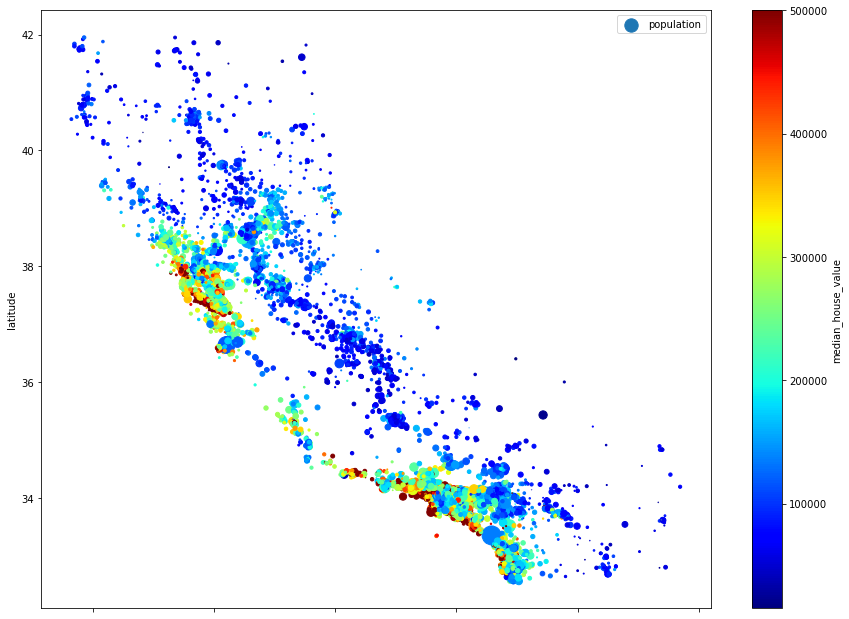

In [20]:
housing_num_df.plot(kind='scatter',x='longitude',y='latitude',alpha=1,
            s=housing_num_df['population']/100,label='population',figsize=(15,11),
            c="median_house_value",cmap=plt.get_cmap('jet'),colorbar=True)
# This plot adds colors to the scatter plot drawn above and makes it a heat map.
# Colors in the heat map indicate the median house value as per the legend shown on the right.
# Red color indicates the highest house price.
# Blue color indicates the lowest house price.
plt.legend() # show the legend as well.
# Houses near the coastal region seem to have a trend of being costly.
# As we go away from coastal region, house prices begin to decline.
# This also shows the importance of latitude and longitude attributes in predicting the house price.

Add more attributes (feature transformation)

In [21]:
# function to add create and add more attributes based on existing attributes
def add_attributes(df): # dataframe is given as input
    df['rooms_per_household'] = df['total_rooms'] / df['households'] # compute and add rooms_per_household column
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'] # compute and add bedrooms_per_room column
    df['population_per_household'] = df['population'] / df['households'] # compute and add population_per_household column
    return df # return the dataframe object with newly added attributes

In [22]:
housing_num_df = add_attributes(housing_num_df)
# housing_num_df is the dataframe object containing original as well as 3 newly added attributes.

Correlation of input features with the output variable gives information about linear relation between input features and output variable. <br>
Computing correlations will help us narrow down the important features to use for prediction.

In [23]:
corr_matrix = housing_num_df.corr()
# corr method on dataframe object computes correlation matrix.
corr_matrix['median_house_value'].sort_values(ascending = False)
# we take the correlations of input feataures only with the output variable in descending sorted order.

median_house_value          1.000000
median_income               0.691290
rooms_per_household         0.171166
total_rooms                 0.131790
housing_median_age          0.102256
households                  0.059841
total_bedrooms              0.043961
population                 -0.030268
population_per_household   -0.031286
longitude                  -0.042187
latitude                   -0.147617
bedrooms_per_room          -0.259107
Name: median_house_value, dtype: float64

median income, rooms per household, total rooms, housing median age and bedrooms per room are more correlated with the median house value as compared to other attributes.

Scatter matrix of the attributes that are more correlated with median house value will indicate the linear relationship visually.

In [24]:
from pandas.plotting import scatter_matrix
# pandas.plotting module has scatter_matrix function that can be used to plot a scatter matrix of all the features 
# that are found to be more correlated with output variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B05F0CBB0>,
      dtype=object)

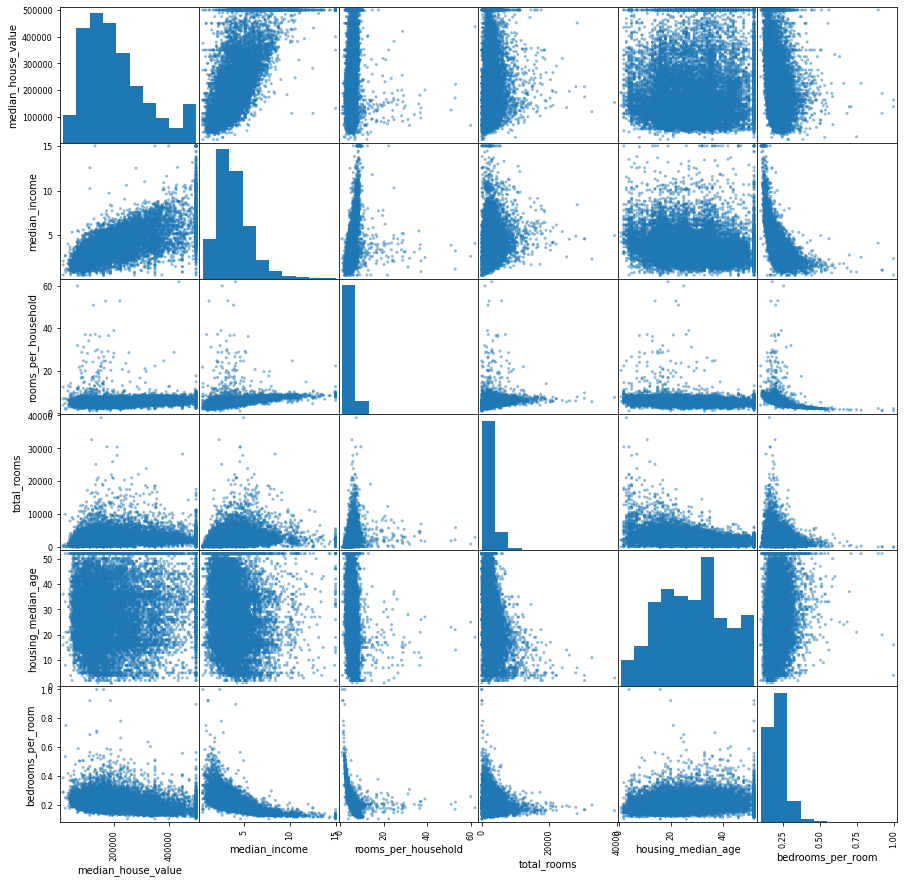

In [25]:
attributes = ['median_house_value','median_income','rooms_per_household','total_rooms','housing_median_age','bedrooms_per_room']
# list of features that are more correlated with median house value.
scatter_matrix(housing_num_df[attributes],figsize=(15,15)) # show scatter matrix
# Plots on main diagonal are histograms since scatterplot of an attribute with itself is always a straight line.

median income is most correlated with median house value.

We plot a scatter plot of median income with median house value seperately.

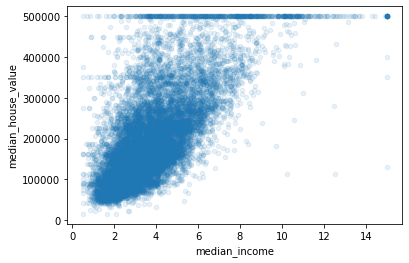

In [26]:
housing_num_df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
# plot method is used again to draw a scatter plot.

The horizontal line present at the top is the price cap that is present in the dataset.

Feature scaling of numerical attributes

In [27]:
from sklearn.preprocessing import StandardScaler
# sklearn.preprocessing has class StandardScaler that can be used to perform standard scaling on numerical attributes.

In [28]:
# function to perform feature scaling
def scale_features(df): # df is the input dataframe
    standard_scaler = StandardScaler() # create an object of class StandardScaler
    arr = standard_scaler.fit_transform(df) # fit_transform will perform standard scaling on every column and return ndarray object.
    df = pd.DataFrame(arr,columns=df.columns) # convert ndarray object back to dataframe.
    return df # return the newlt created dataframe whose all features are scaled properly.

In [29]:
housing_num_df = scale_features(housing_num_df)
# housing_num_df is the dataframe object that has all the columns scaled according to standard scaling.

Summary of categorical attribute in the dataset

In [30]:
housing_cat_df['ocean_proximity'].value_counts()
# display counts of records for each of the values of categorical attribute - ocean_proximity

<1H OCEAN     5848
INLAND        4217
NEAR OCEAN    1651
NEAR BAY      1491
ISLAND           2
Name: ocean_proximity, dtype: int64

One hot encoding of categorical attribute:

In [31]:
from sklearn.preprocessing import OneHotEncoder
# Since the variable ocean_proximity is nominal (not ordinal), one hot encoding is performed on it to make it numerical.

In [32]:
# function to perform one hot encoding on categorical attributes in a dataframe
def encode_categorical(df): # df is the input dataframe object
    one_hot_encoder = OneHotEncoder() # create object of one hot encoder class
    arr = one_hot_encoder.fit_transform(df).toarray() # fit_transform method will perform one-hot encoding and return ndarray object
    df = pd.DataFrame(arr,columns=one_hot_encoder.categories_) # convert ndarray object into dataframe object
    return df # return the dataframe object with one-hot encoded categorical attributes

In [33]:
housing_cat_df = encode_categorical(housing_cat_df)
# housing_cat_df is the dataframe object containing one-hot encoded categorical attributes.

In [34]:
# function to merge transformed numerical and one-hot encoded categorical attributes to make a final set of training ML models
def merge_num_cat(num_df,cat_df): # transformed numerical and encoded categorical dataframe as input
    return pd.concat([num_df,cat_df],axis=1) # concatenate the columns and return the merged dataframe object

In [35]:
# function to perform the whole data trnsformation pipeline
def prepare_data(df): # original raw dataframe as input
    num_df,cat_df = seperate_num_cat(df) # seperate numerical and categorical attributes into 2 seperate dataframe obejcts
    num_df = fill_in_missing_values(num_df) # fill in the missing numerical values with medians
    num_df = add_attributes(num_df) # add 3 new attributes
    num_df = scale_features(num_df) # perform feature scaling
    cat_df = encode_categorical(cat_df) # perform one-hot encoding of categorical attributes
    prep_df = merge_num_cat(num_df,cat_df) # merge numerical and categorical attributes
    return prep_df # return the final dataset for training ML models

Prepare train set for training

In [36]:
X_train = prepare_data(housing_train_df.drop('median_house_value',axis=1))
# X_train is the final dataframe object to be used as training set for ML models
y_train = housing_train_df['median_house_value']
# y_train is the vector of corresponding median house prices.
X_train = np.array(X_train) # convert dataframe object to ndarray object
y_train = np.array(y_train) # convert dataframe obejct to ndarray object

Prepare cross-validation for model selection

In [37]:
X_crossval = prepare_data(housing_crossval_df.drop('median_house_value',axis=1))
# X_crossval is the dataframe object to be used for cross-validation of trained ML models.
y_crossval = housing_crossval_df['median_house_value']
# y_crossval is the vector of corresponding median house prices.
X_crossval = np.array(X_crossval) # convert dataframe object to ndarray object
y_crossval = np.array(y_crossval) # convert dataframe object to ndarray object

Prepare test set for testing

In [38]:
X_test = prepare_data(housing_test_df.drop('median_house_value',axis=1))
# X_test is the dataframe object to be used for testing of selected ML model.
y_test = housing_test_df['median_house_value']
# y_test is the vector of corresponding median house prices.
X_test = np.array(X_test) # convert dataframe object to ndarray object
y_test = np.array(y_test) # convert dataframe object to ndarray object

Model Training

In [39]:
from sklearn.metrics import mean_squared_error
# sklearn.metrics module has mean_squared_error function to compute MSE between predicted values and true values.

Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
# sklearn.linear_model has class LinearRegression which can be used to perform linear regression with no regularization.

In [41]:
lin_reg = LinearRegression() # create object of LinearRegression class
lin_reg.fit(X_train,y_train) # fit method performs training of linear regression model.
y_hat = lin_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = lin_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Linear Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Linear Regression
Train RMSE 67379.66939567216
Cross Validation RMSE 68663.58733402916


Linear Regression is underfitting the data.

Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
# sklearn.linear_model has class Ridge which can be used to perform linear regression with ridge regularization.

In [43]:
ridge_reg = Ridge() # create object of Ridge class
ridge_reg.fit(X_train,y_train) # fit method performs training of ridge regression model.
y_hat = ridge_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = ridge_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Ridge Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Ridge Regression
Train RMSE 67383.99785201537
Cross Validation RMSE 68597.03147378171


Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
# sklearn.linear_model has class Lasso which can be used to perform linear regression with lasso regularization.

In [45]:
lasso_reg = Lasso(max_iter=5000) # create object of Lasso class
lasso_reg.fit(X_train,y_train) # fit method performs training of lasso regression model.
y_hat = lasso_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = lasso_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Lasso Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Lasso Regression
Train RMSE 67379.71904129331
Cross Validation RMSE 68654.96600161702


Elastic Net Regression

In [46]:
from sklearn.linear_model import ElasticNet
# sklearn.linear_model has class ElasticNet which can be used to perform linear regression with elastic-net regularization.

In [47]:
elastic_reg = ElasticNet(max_iter=5000) # create object of ElasticNet class
elastic_reg.fit(X_train,y_train) # fit method performs training of elastic net regression model.
y_hat = elastic_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = elastic_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Elastic Net Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Elastic Net Regression
Train RMSE 77998.87274145054
Cross Validation RMSE 80173.12795974012


Least Angle Regression

In [48]:
from sklearn.linear_model import Lars
# sklearn.linear_model has class Lars which can be used to perform least angle regression.

In [49]:
lars_reg = Lars() # create object of Lars class
lars_reg.fit(X_train,y_train) # fit method performs training of least angle regression model.
y_hat = lars_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = lars_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Least Angle Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Least Angle Regression
Train RMSE 67379.66939567216
Cross Validation RMSE 68663.58733402914


Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
# sklearn.tree has class DecisionTreeRegressor which can be used to perform regression using decision tree.

In [51]:
tree_reg = DecisionTreeRegressor() # create object of DecisionTreeRegressor class
tree_reg.fit(X_train,y_train) # fit method performs training of decision tree model.
y_hat = tree_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = tree_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Decision Tree Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Decision Tree Regression
Train RMSE 0.0
Cross Validation RMSE 77407.55247507605


Decision Tree Regression is overfitting the data.

Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
# sklearn.ensemble has class RandomForestRegressor which can be used to perform regression using random forest.

In [53]:
forest_reg = RandomForestRegressor(n_estimators = 40, max_features=10) # create object of RandomForestRegressor class
forest_reg.fit(X_train,y_train) # fit method performs training of random forest model.
y_hat = forest_reg.predict(X_train) # compute predicted y values for train set
train_error = np.sqrt(mean_squared_error(y_train,y_hat)) # compute rmse between true values and predicted values on training set.
y_hat = forest_reg.predict(X_crossval) # compute predicted y values for crossvalidation set
crossval_error = np.sqrt(mean_squared_error(y_crossval,y_hat)) # compute rmse between true values and predicted values on crossvalidation set.
print('Model:','Random Forest Regression') # display name of ML model
print('Train RMSE',train_error) # display training RMSE
print('Cross Validation RMSE',crossval_error) # display cross-validation RMSE

Model: Random Forest Regression
Train RMSE 19037.15828457233
Cross Validation RMSE 58892.65729698174


Model Selection

As Random Forest Regressor has the lowest cross validation error, it is selected as the final model for future predictions.

In [54]:
# Test Error
y_hat = forest_reg.predict(X_test) # compute predicted y values for test set
test_error = np.sqrt(mean_squared_error(y_test,y_hat)) # compute rmse between true values and predicted values on test set.
print('Model:','Random Forest Regression')  # display name of ML model
print('Train RMSE',train_error) # display train RMSE
print('Test RMSE',test_error) # display test RMSE

Model: Random Forest Regression
Train RMSE 19037.15828457233
Test RMSE 69512.40339641721


Save the model in a file for further predictions

In [55]:
import pickle
# pickle module is used to store the trained random forest model as serialized binary object. <br>
# It can be loaded directly and used for further predictions.

In [56]:
f = open('forest_reg.pkl','wb') # create a pickle file to store random forest model. wb indicates write binary.
pickle.dump(forest_reg,f) # dump method writes the serialized random forest model into opened file
f.close() # close writes the buffered output from RAM to Hard disk and closes the file.

Load the model from a file for predictions

In [57]:
f = open('forest_reg.pkl','rb') # open a pickle file to load random forest model. rb indicates read binary.
forest_reg = pickle.load(f) # load method loads the object of RandomForestRegressor class into memory.

In [58]:
print(forest_reg) # display the string representation of loaded ML model

RandomForestRegressor(max_features=10, n_estimators=40)
